![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [24]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1 - Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df = pd.get_dummies(penguins_df, dtype='int', drop_first=True)
penguins_df.info()
print(penguins_df.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex_MALE           332 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.1 KB
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0              39.1             18.7              181.0       3750.0         1
1              39.5             17.4              186.0       3800.0         0
2              40.3             18.0              195.0       3250.0         0
3              36.7             19.3              193.0       3450.0         0
4              39.3             20.6              190.0       3650.0         1
5              38.9             17.

In [25]:
# Step 2 - Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=scaled_data, columns=penguins_df.columns)
print(penguins_preprocessed.head(15))

    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0          -0.903906         0.790360          -1.425342    -0.566948  0.993994
1          -0.830434         0.126187          -1.068577    -0.504847 -1.006042
2          -0.683490         0.432728          -0.426399    -1.187953 -1.006042
3          -1.344738         1.096901          -0.569105    -0.939551 -1.006042
4          -0.867170         1.761074          -0.783164    -0.691149  0.993994
5          -0.940642         0.330548          -1.425342    -0.722199 -1.006042
6          -0.885538         1.250172          -0.426399     0.581912  0.993994
7          -0.536545         0.228367          -1.353989    -1.250054 -1.006042
8          -0.995746         2.067616          -0.711811    -0.504847  0.993994
9          -1.363106         0.330548          -1.139930    -0.629049 -1.006042
10         -0.977378         0.943631          -0.426399    -0.939551 -1.006042
11         -0.279393         1.812165   

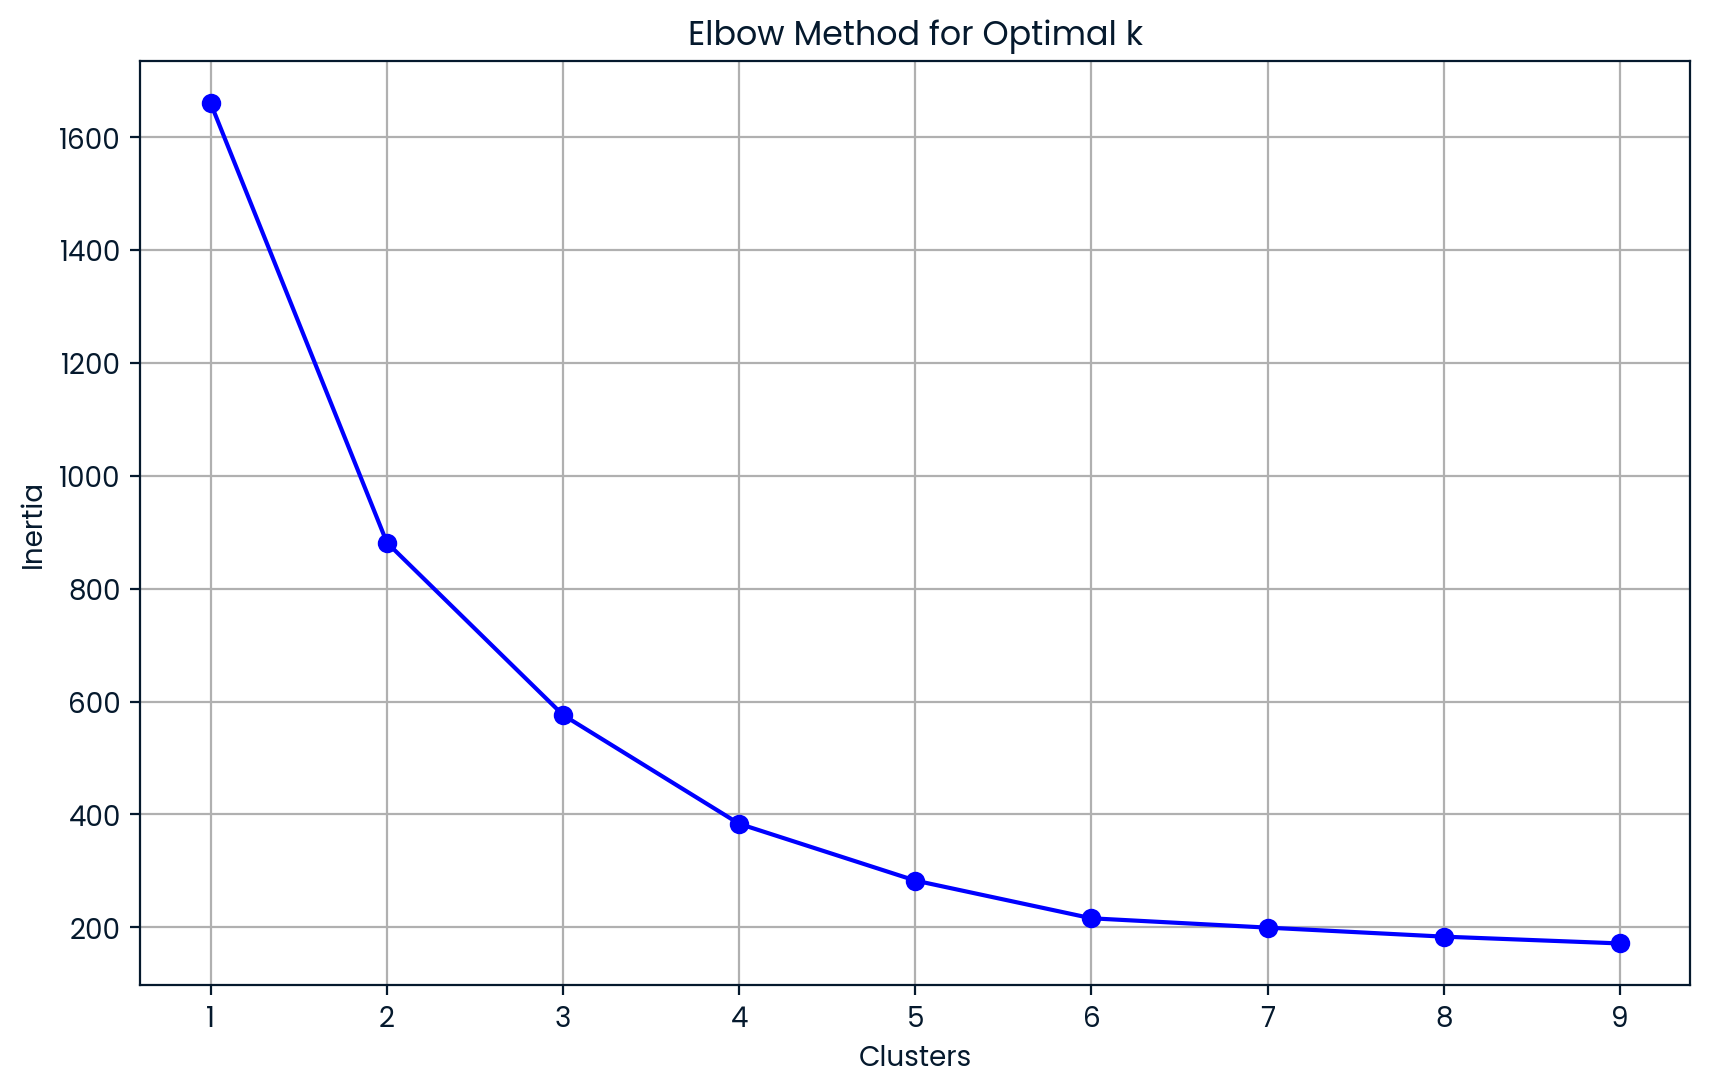

In [26]:
# Step 3 - Calculate inertia for different k values
inertia = []
num_clusters = range(1, 10)

for i in num_clusters:
    # Create KMeans object with current number of clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    
    # Fit the model to our data
    kmeans.fit(penguins_preprocessed)
    # Get the inertia 
    inertia.append(kmeans.inertia_)  
    
# Step 4 - Create elbow plot
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertia,'bo-')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()


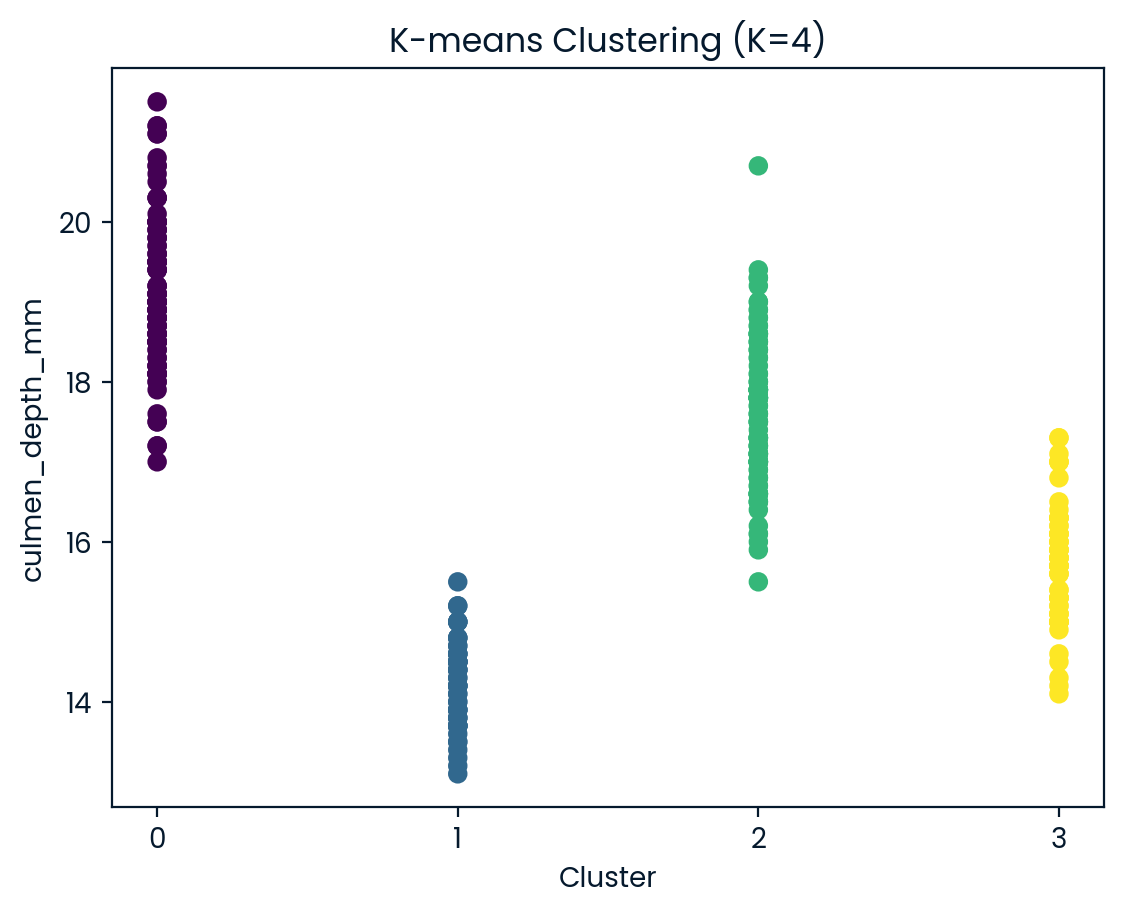

In [27]:
#Step 5 - Run the k-means clustering algorithm
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

# visualize the clusters (here for the 'culmen_depth_mm' column)
xs = penguins_df['label']
ys = penguins_df['culmen_depth_mm']
plt.scatter(xs, ys, c=kmeans.labels_)
plt.xlabel('Cluster')
plt.ylabel('culmen_depth_mm')
plt.xticks(range(n_clusters))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()


In [28]:
#Step 6 - create final 'stat_penguins' DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984
